# Compare N2 decadal change in the global ocean using EasyOcean data

- Use configurated data from https://cchdo.ucsd.edu/products/goship-easyocean
- Use gridded data (.mat) with stratification calculations (STrun.m; updated grid_data_pressure.m)


In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import scipy.io as sio
import os
import matplotlib.pyplot as plt

import topo as topo

In [2]:
def plot_N2_trend_z(data_N2_trend, ax, dl, dz, vrange=[-1e-7,1e-7], yrange=[6000, 0]):
    from matplotlib import cm
    import matplotlib as mpl

    norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=vrange[-1], vmin=vrange[0], base=10)

    ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]), 
              np.hstack([data_N2_trend.z_N2.data - dz/2, data_N2_trend.z_N2.data[-1] + dz/2]), 
              data_N2_trend.trend_N2_mean.T, vmax=vrange[-1], vmin=vrange[0], cmap=cm.PiYG_r, norm=norm)
    # data_N2_trend.trend_N2_CI[:,:,1].plot.contour(ax=ax, y='z_N2', levels=[0], colors='grey')
    
    for j in range(len(data_N2_trend.LL_st)):
        for k in range(len(data_N2_trend.z_N2)):
            if data_N2_trend.trend_N2_CI[j,k,1] < 0:
#                 ax.plot(data_N2_trend.LL_st[j], data_N2_trend.z_N2[k], 'kp')
                ax.plot([data_N2_trend.LL_st[j], data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dz/4, data_N2_trend.z_N2[k]+dz/2], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]+dl], [data_N2_trend.z_N2[k]-dz/2, data_N2_trend.z_N2[k]+dz/4], 'k-', lw=.5)
            if data_N2_trend.trend_N2_CI[j,k,0] > 0:
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]], [data_N2_trend.z_N2[k]-dz/2, data_N2_trend.z_N2[k]+dz/4], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl, data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dz/4, data_N2_trend.z_N2[k]+dz/2], 'k-', lw=.5)
    ax.set_ylim(yrange)
    
    
    
def plot_N2_trend_sig(data_N2_trend, ax, dl, dsig, vrange=[-1e-7,1e-7], yrange=[46.13, 46.01]):
    from matplotlib import cm
    import matplotlib as mpl

    norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=vrange[-1], vmin=vrange[0], base=10)

    ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]), 
              np.hstack([data_N2_trend.z_N2.data - dsig/2, data_N2_trend.z_N2.data[-1] + dsig/2]), 
              data_N2_trend.trend_N2_mean.T, vmax=vrange[-1], vmin=vrange[0], cmap=cm.PiYG_r, norm=norm)
    # data_N2_trend.trend_N2_CI[:,:,1].plot.contour(ax=ax, y='z_N2', levels=[0], colors='grey')
    
    for j in range(len(data_N2_trend.LL_st)):
        for k in range(len(data_N2_trend.z_N2)):
            if data_N2_trend.trend_N2_CI[j,k,1] < 0:
                ax.plot([data_N2_trend.LL_st[j], data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dsig/4, data_N2_trend.z_N2[k]+dsig/2], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]+dl], [data_N2_trend.z_N2[k]-dsig/2, data_N2_trend.z_N2[k]+dsig/4], 'k-', lw=.5)
            if data_N2_trend.trend_N2_CI[j,k,0] > 0:
                ax.plot([data_N2_trend.LL_st[j]+dl/2, data_N2_trend.LL_st[j]], [data_N2_trend.z_N2[k]-dsig/2, data_N2_trend.z_N2[k]+dsig/4], 'k-', lw=.5)
                ax.plot([data_N2_trend.LL_st[j]+dl, data_N2_trend.LL_st[j]+dl/2], [data_N2_trend.z_N2[k]-dsig/4, data_N2_trend.z_N2[k]+dsig/2], 'k-', lw=.5)
    ax.set_ylim(yrange)


In [3]:
def loc_dep_sec(acquisition, method, datafilepath):
    """method = 1: lon section
       method = 0, lat section """
    # station_loc[occupation, lon/lat, station]

    acqui_path = datafilepath + acquisition + '/'
    print(10*"-", acquisition, 10*"-")
    for filename_ in os.listdir(acqui_path):
        if (filename_.endswith(".mat")):  # mat data
            data0 = sio.loadmat(acqui_path + filename_,
                                squeeze_me=True, struct_as_record=False)
            span = np.zeros(len(data0['D_reported']),)
            
            if method:
                for i in range(len(span)):
                    if i == 0:
                        loc = data0['D_reported'][i].latlist
                        depth = data0['D_reported'][i].deplist
                    else:
                        loc = np.hstack([loc, data0['D_reported'][i].latlist])
                        depth = np.hstack([depth, data0['D_reported'][i].deplist])
            else:
                for i in range(len(span)):
                    if i == 0:
                        loc = data0['D_reported'][i].lonlist
                        depth = data0['D_reported'][i].deplist
                    else:
                        loc = np.hstack([loc, data0['D_reported'][i].lonlist])
                        depth = np.hstack([depth, data0['D_reported'][i].deplist])
                        
            ind = np.argsort(loc)
            depth = depth[ind]
            loc = loc[ind]
    
    
    return loc, depth

## Parameters

In [4]:
# path to WOCE read trend results
resultfilepath = '../results/'
datafilepath = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/gridded/'
datafilepath_sec = '/Users/stan/Desktop/WORK/DATA/GOSHIP/EasyOcean/reported/'
# path to saved data
outfilepath = '../figure/'

param_plot = {"z1_up": 2000,
              "z2_up": 0,
              "z1_lw": 6000,
              "z2_lw": 2000,
              "sig1_up": 45.65,
              "sig2_up": 43,
              "sig1_lw": 46.25,
              "sig2_lw": 45.95,
              "vlim1": [-1e-7,1e-7],
              "vlim2": [-1e-7,1e-7],
              "vlim_factor1": [.8,1.2],
              "vlim_factor2": [.8,1.2],
            }

# load bathymetry and create a DataArray object
Topo = topo.read_topo('../data/', 'ETOPO1_Bed_g_geotiff.tif', 0)

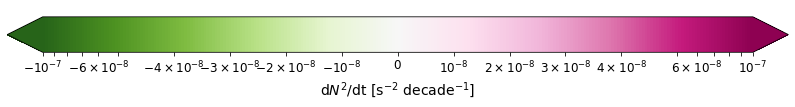

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(14,1.2))

fraction = 1  # .05

norm = mpl.colors.SymLogNorm(linthresh=5e-8, vmax=param_plot['vlim1'][-1], vmin=param_plot['vlim1'][0], base=10)
cbar = ax.figure.colorbar(
            mpl.cm.ScalarMappable(norm=norm, cmap='PiYG_r'),
            ax=ax, pad=.15, extend='both', fraction=fraction, orientation="horizontal")
cbar.ax.tick_params(labelsize=12)
cbar.set_label(label='d$N^2$/dt [s$^{-2}$ decade$^{-1}$]', fontsize=14)

ax.axis('off')
plt.savefig(outfilepath+ 'N2trend_colorbar.jpeg', dpi=300)
plt.savefig(outfilepath+ 'N2trend_colorbar.eps')


## Atlantic Ocean

### 1. selected longitudial sections

In [6]:
# longitudial sections
lon_sec = ['A16-A23', 'A13', 'A12']
method_sec = 1

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),


---------- A16-A23 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4216991260.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4216991260.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl])

---------- A13 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4216991260.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4216991260.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- A12 ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


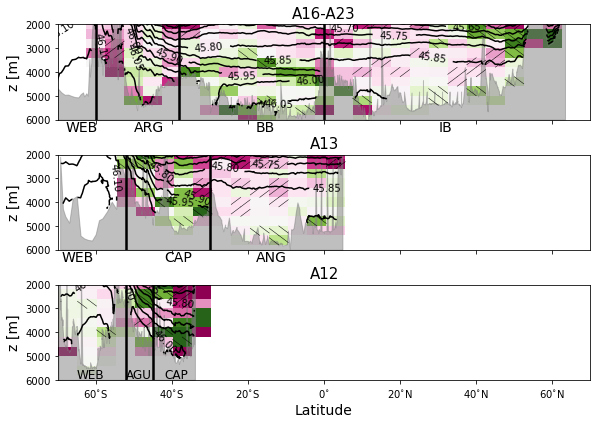

In [7]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
        
    if lon_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'southern/')
    else:
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'atlantic/')
    
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

ax[0].text(-68, 6500, 'WEB', fontsize=14)
ax[0].plot([-60, -60], [2000, 6000], 'k', lw=2.5)
ax[0].text(-50, 6500, 'ARG', fontsize=14)
ax[0].plot([-38, -38], [2000, 6000], 'k', lw=2.5)
ax[0].text(-18, 6500, 'BB', fontsize=14)
ax[0].plot([0, 0], [2000, 6000], 'k', lw=2.5)
ax[0].text(30, 6500, 'IB', fontsize=14)

ax[1].text(-69, 6500, 'WEB', fontsize=14)
ax[1].plot([-52, -52], [2000, 6000], 'k', lw=2.5)
ax[1].text(-42, 6500, 'CAP', fontsize=14)
ax[1].plot([-30, -30], [2000, 6000], 'k', lw=2.5)
ax[1].text(-18, 6500, 'ANG', fontsize=14)

ax[-1].text(-65, 5950, 'WEB', fontsize=12)
ax[-1].plot([-52, -52], [2000, 6000], 'k', lw=2.5)
ax[-1].text(-52, 5950, 'AGU', fontsize=12)
ax[-1].plot([-45, -45], [2000, 6000], 'k', lw=2.5)
ax[-1].text(-42, 5950, 'CAP', fontsize=12)

plt.tight_layout(h_pad=.2)
plt.savefig(outfilepath+ 'Atlantic_meridional_selected_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Atlantic_meridional_selected_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

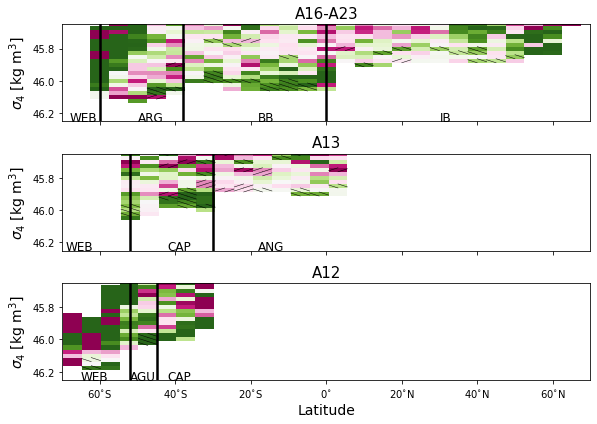

In [8]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
        
ax[0].text(-68, param_plot['sig1_lw'], 'WEB', fontsize=12)
ax[0].plot([-60, -60], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[0].text(-50, param_plot['sig1_lw'], 'ARG', fontsize=12)
ax[0].plot([-38, -38], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[0].text(-18,  param_plot['sig1_lw'], 'BB', fontsize=12)
ax[0].plot([0, 0], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[0].text(30, param_plot['sig1_lw'], 'IB', fontsize=12)

ax[1].text(-69, param_plot['sig1_lw'], 'WEB', fontsize=12)
ax[1].plot([-52, -52], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[1].text(-42, param_plot['sig1_lw'], 'CAP', fontsize=12)
ax[1].plot([-30, -30], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[1].text(-18, param_plot['sig1_lw'], 'ANG', fontsize=12)

ax[-1].text(-65, param_plot['sig1_lw'], 'WEB', fontsize=12)
ax[-1].plot([-52, -52], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[-1].text(-52, param_plot['sig1_lw'], 'AGU', fontsize=12)
ax[-1].plot([-45, -45], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[-1].text(-42, param_plot['sig1_lw'], 'CAP', fontsize=12)

plt.tight_layout()
plt.savefig(outfilepath+ 'Atlantic_meridional_selected_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Atlantic_meridional_selected_N2trend_sigma.eps')

### 2. latitudinal sections

In [9]:
# latitudinal sections
lat_sec = ['75N', 'AR07E', 'A02', 'A05', 'A10', 'SR04']
method_sec = 0

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- 75N ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- AR07E ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- A02 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- A05 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- A10 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/2155302656.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.

---------- SR04 ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

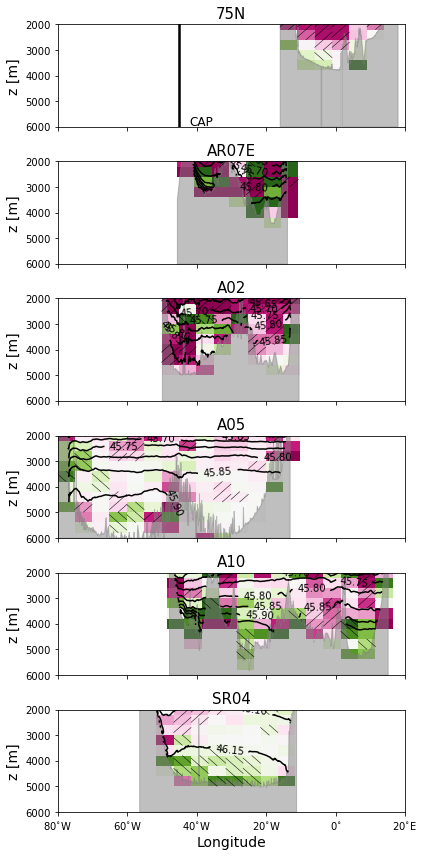

In [10]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(100/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    ll_st = Data_trend.LL_st.data
    ll = Data.LL.data
    ll_st[ll_st>180] -= 360 
    ll[ll>180] -= 360 
    Data = Data.assign_coords(LL=ll)
    Data_trend = Data_trend.assign_coords(LL_st=ll_st)
    Data_trend_sig4 = Data_trend_sig4.assign_coords(LL_st=ll_st)    
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([-80, 20])
    ax[i].set_xticks(np.arange(-80, 20+1, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['80$^{\circ}$W','60$^{\circ}$W','40$^{\circ}$W','20$^{\circ}$W',
                               '0$^{\circ}$', '20$^{\circ}$E'])
        ax[i].set_xlabel('Longitude', fontsize=14)
        
    if lat_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'southern/')
        loc_ll[loc_ll>180]-=360
    else:
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'atlantic/')
        loc_ll[loc_ll>180]-=360
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

ax[0].plot([-45, -45], [2000, 6000], 'k', lw=2.5)
ax[0].text(-42, 5950, 'CAP', fontsize=12)

plt.tight_layout()
plt.savefig(outfilepath+ 'Atlantic_zonal_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Atlantic_zonal_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

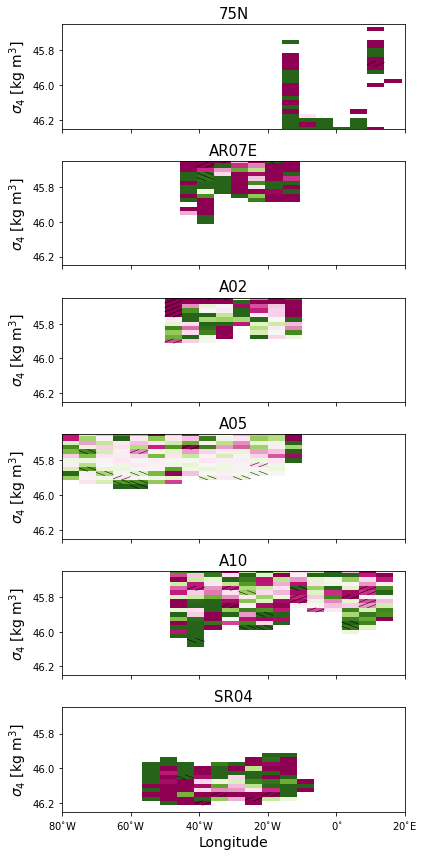

In [11]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(100/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")

    ll_st = Data_trend.LL_st.data
    ll = Data.LL.data
    ll_st[ll_st>180] -= 360 
    ll[ll>180] -= 360 
    Data = Data.assign_coords(LL=ll)
    Data_trend = Data_trend.assign_coords(LL_st=ll_st)
    Data_trend_sig4 = Data_trend_sig4.assign_coords(LL_st=ll_st)      
    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([-80, 20])
    ax[i].set_xticks(np.arange(-80, 20+1, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['80$^{\circ}$W','60$^{\circ}$W','40$^{\circ}$W','20$^{\circ}$W',
                               '0$^{\circ}$', '20$^{\circ}$E'])
        ax[i].set_xlabel('Longitude', fontsize=14)

plt.tight_layout()
plt.savefig(outfilepath+ 'Atlantic_zonal_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Atlantic_zonal_N2trend_sigma.eps')

## Pacific Ocean

### 1. selected longitudial sections

In [12]:
# longitudial sections
lon_sec = ['SR03', 'P14', 'P15', 'P16', 'P17E', 'P18']
method_sec = 1

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- SR03 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P14 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P15 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P16 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P17E ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1204171896.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- P18 ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

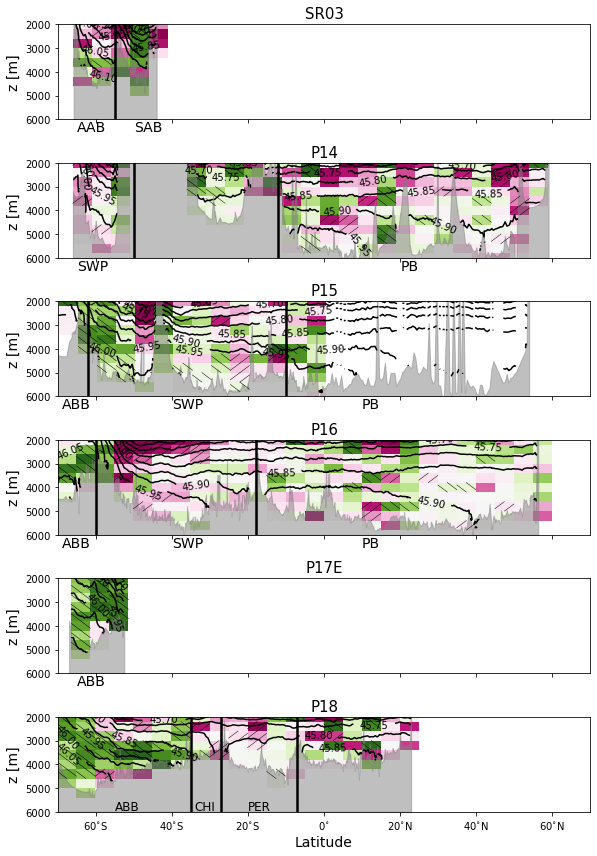

In [13]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
        
    if lon_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'southern/')
    else:
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'pacific/')
        
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

ax[0].text(-65, 6500, 'AAB', fontsize=14)
ax[0].plot([-55, -55], [2000, 6000], 'k', lw=2.5)
ax[0].text(-50, 6500, 'SAB', fontsize=14)

ax[1].text(-65, 6500, 'SWP', fontsize=14)
ax[1].plot([-50, -50], [2000, 6000], 'k', lw=2.5)
ax[1].text(20, 6500, 'PB', fontsize=14)
ax[1].plot([-12, -12], [2000, 6000], 'k', lw=2.5)

ax[2].text(-69, 6500, 'ABB', fontsize=14)
ax[2].plot([-62, -62], [2000, 6000], 'k', lw=2.5)
ax[2].text(-40, 6500, 'SWP', fontsize=14)
ax[2].plot([-10, -10], [2000, 6000], 'k', lw=2.5)
ax[2].text(10, 6500, 'PB', fontsize=14)

ax[3].text(-69, 6500, 'ABB', fontsize=14)
ax[3].plot([-60, -60], [2000, 6000], 'k', lw=2.5)
ax[3].text(-40, 6500, 'SWP', fontsize=14)
ax[3].plot([-18, -18], [2000, 6000], 'k', lw=2.5)
ax[3].text(10, 6500, 'PB', fontsize=14)

ax[4].text(-65, 6500, 'ABB', fontsize=14)

ax[-1].text(-55, 5950, 'ABB', fontsize=12)
ax[-1].plot([-35, -35], [2000, 6000], 'k', lw=2.5)
ax[-1].text(-34, 5950, 'CHI', fontsize=12)
ax[-1].plot([-27, -27], [2000, 6000], 'k', lw=2.5)
ax[-1].text(-20, 5950, 'PER', fontsize=12)
ax[-1].plot([-7, -7], [2000, 6000], 'k', lw=2.5)

plt.tight_layout()
plt.savefig(outfilepath+ 'Pacific_meridional_selected_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Pacific_meridional_selected_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

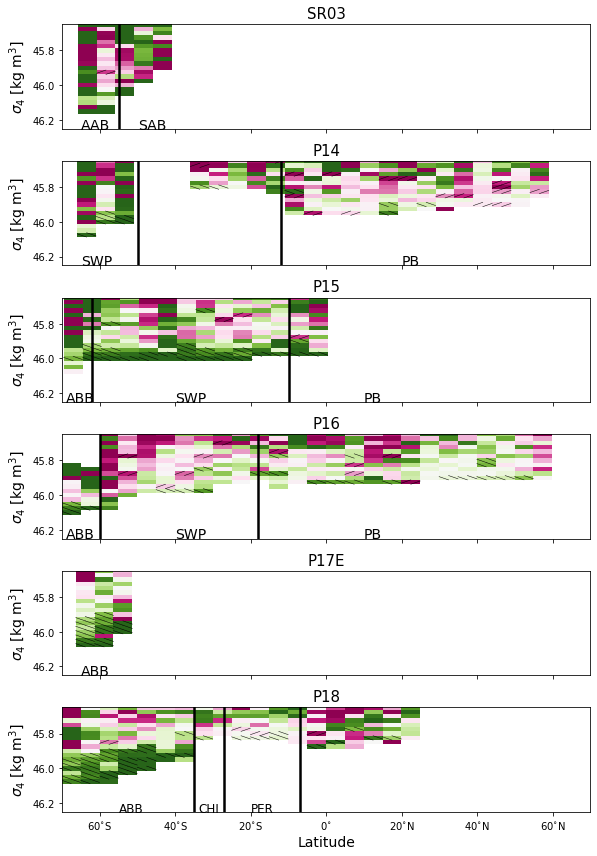

In [14]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
        
ax[0].text(-65, param_plot['sig1_lw'], 'AAB', fontsize=14)
ax[0].plot([-55, -55], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[0].text(-50, param_plot['sig1_lw'], 'SAB', fontsize=14)

ax[1].text(-65, param_plot['sig1_lw'], 'SWP', fontsize=14)
ax[1].plot([-50, -50], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[1].text(20, param_plot['sig1_lw'], 'PB', fontsize=14)
ax[1].plot([-12, -12], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)

ax[2].text(-69, param_plot['sig1_lw'], 'ABB', fontsize=14)
ax[2].plot([-62, -62], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[2].text(-40, param_plot['sig1_lw'], 'SWP', fontsize=14)
ax[2].plot([-10, -10], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[2].text(10, param_plot['sig1_lw'], 'PB', fontsize=14)

ax[3].text(-69, param_plot['sig1_lw'], 'ABB', fontsize=14)
ax[3].plot([-60, -60], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[3].text(-40, param_plot['sig1_lw'], 'SWP', fontsize=14)
ax[3].plot([-18, -18], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[3].text(10, param_plot['sig1_lw'], 'PB', fontsize=14)

ax[4].text(-65, param_plot['sig1_lw'], 'ABB', fontsize=14)

ax[-1].text(-55, param_plot['sig1_lw'], 'ABB', fontsize=12)
ax[-1].plot([-35, -35], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[-1].text(-34, param_plot['sig1_lw'], 'CHI', fontsize=12)
ax[-1].plot([-27, -27], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[-1].text(-20, param_plot['sig1_lw'], 'PER', fontsize=12)
ax[-1].plot([-7, -7], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)

plt.tight_layout()
plt.savefig(outfilepath+ 'Pacific_meridional_selected_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Pacific_meridional_selected_N2trend_sigma.eps')

### 2. latitudinal sections

In [15]:
# latitudinal sections
lat_sec = ['P01', 'P02', 'P03', 'P21', 'P06', 'S04P']
method_sec = 0

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P01 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P02 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P03 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P21 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- P06 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1782005752.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- S04P ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

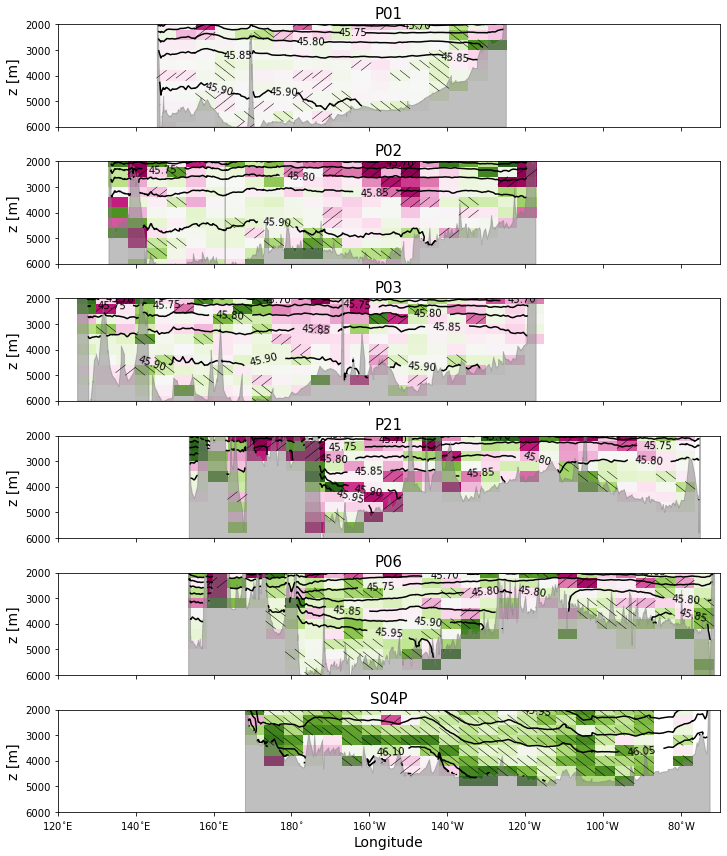

In [16]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(170/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([120, 290])
    ax[i].set_xticks(np.arange(120, 290, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['120$^{\circ}$E','140$^{\circ}$E','160$^{\circ}$E','180$^{\circ}$',
                               '160$^{\circ}$W', '140$^{\circ}$W', '120$^{\circ}$W', '100$^{\circ}$W', '80$^{\circ}$W'])
        ax[i].set_xlabel('Longitude', fontsize=14)       
        
    if lat_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'southern/')
#         loc_ll[loc_ll>180]-=360
    else:
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'pacific/')
#         loc_ll[loc_ll>180]-=360   
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

plt.tight_layout()
plt.savefig(outfilepath+ 'Pacific_zonal_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Pacific_zonal_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

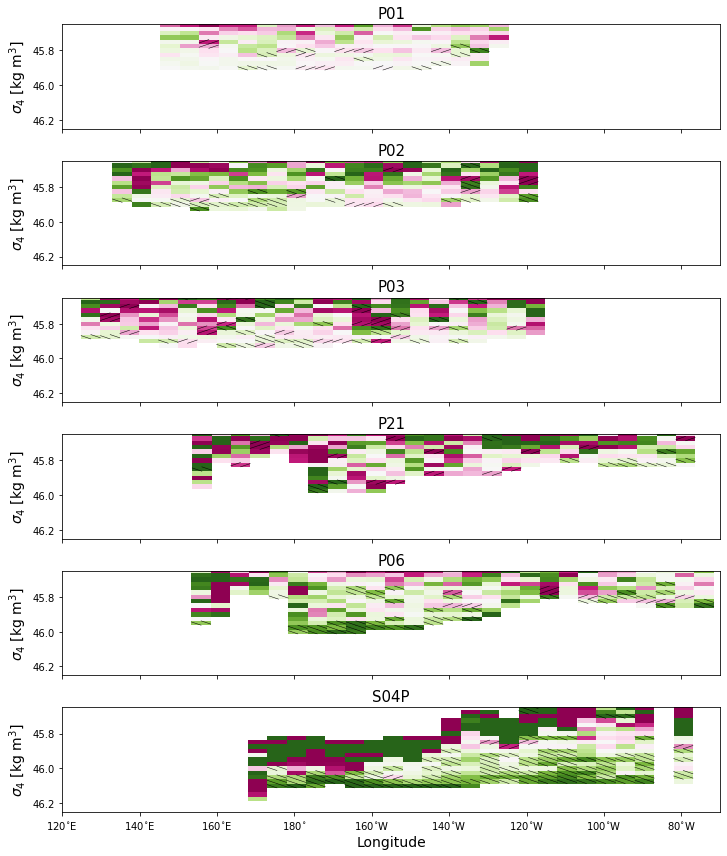

In [17]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(170/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([120, 290])
    ax[i].set_xticks(np.arange(120, 290, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['120$^{\circ}$E','140$^{\circ}$E','160$^{\circ}$E','180$^{\circ}$',
                               '160$^{\circ}$W', '140$^{\circ}$W', '120$^{\circ}$W', '100$^{\circ}$W', '80$^{\circ}$W'])
        ax[i].set_xlabel('Longitude', fontsize=14)

plt.tight_layout()
plt.savefig(outfilepath+ 'Pacific_zonal_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Pacific_zonal_N2trend_sigma.eps')

## Indian Ocean

### 1. selected longitudial sections

In [18]:
# longitudial sections
lon_sec = ['I06S', 'I08S-I09N', 'I09S']
method_sec = 1

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- I06S ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- I08S-I09N ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/1217996883.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5'

---------- I09S ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


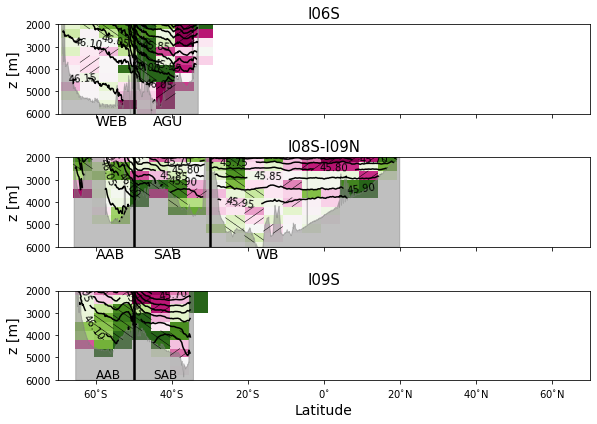

In [19]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)        
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
    if lon_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'southern/')
    else:
        loc_ll, dep_ll = loc_dep_sec(lon_sec[i], method_sec, datafilepath_sec+'indian/')
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

ax[0].text(-60, 6500, 'WEB', fontsize=14)
ax[0].plot([-50, -50], [2000, 6000], 'k', lw=2.5)
ax[0].text(-45, 6500, 'AGU', fontsize=14)

ax[1].text(-60, 6500, 'AAB', fontsize=14)
ax[1].plot([-50, -50], [2000, 6000], 'k', lw=2.5)
ax[1].text(-45, 6500, 'SAB', fontsize=14)
ax[1].plot([-30, -30], [2000, 6000], 'k', lw=2.5)
ax[1].text(-18, 6500, 'WB', fontsize=14)

ax[-1].text(-60, 5950, 'AAB', fontsize=12)
ax[-1].plot([-50, -50], [2000, 6000], 'k', lw=2.5)
ax[-1].text(-45, 5950, 'SAB', fontsize=12)

plt.tight_layout()
plt.savefig(outfilepath+ 'Indian_meridional_selected_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Indian_meridional_selected_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

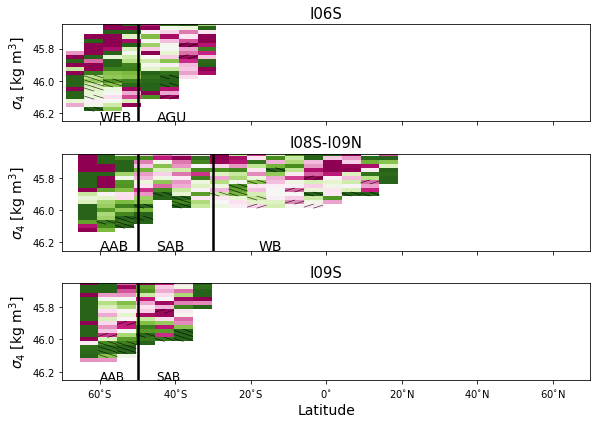

In [20]:
fig, ax = plt.subplots(nrows=len(lon_sec), ncols=1, figsize=(140/100*6, len(lon_sec)*2), sharex=True)
for i in range(len(lon_sec)):
    acquisition = lon_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([-70, 70])
    ax[i].set_xticks(np.arange(-60, 60+1, 20))
    if i == len(lon_sec)-1:
        ax[i].set_xticklabels(['60$^{\circ}$S','40$^{\circ}$S','20$^{\circ}$S','0$^{\circ}$',
                            '20$^{\circ}$N','40$^{\circ}$N','60$^{\circ}$N'])
        ax[i].set_xlabel('Latitude', fontsize=14)
        
ax[0].text(-60, param_plot['sig1_lw'], 'WEB', fontsize=14)
ax[0].plot([-50, -50], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[0].text(-45, param_plot['sig1_lw'], 'AGU', fontsize=14)

ax[1].text(-60, param_plot['sig1_lw'], 'AAB', fontsize=14)
ax[1].plot([-50, -50], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[1].text(-45, param_plot['sig1_lw'], 'SAB', fontsize=14)
ax[1].plot([-30, -30], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[1].text(-18, param_plot['sig1_lw'], 'WB', fontsize=14)

ax[-1].text(-60, param_plot['sig1_lw'], 'AAB', fontsize=12)
ax[-1].plot([-50, -50], [param_plot['sig1_lw'], param_plot['sig1_up']], 'k', lw=2.5)
ax[-1].text(-45, param_plot['sig1_lw'], 'SAB', fontsize=12)

plt.tight_layout()
plt.savefig(outfilepath+ 'Indian_meridional_selected_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Indian_meridional_selected_N2trend_sigma.eps')

### 2. latitudinal sections

In [21]:
# latitudinal sections
lat_sec = ['I01', 'I02', 'I03-I04', 'I05', 'S04I']
method_sec = 0

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- I01 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- I02 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- I03-I04 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- I05 ----------


/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:7: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: RuntimeWarning: Mean of empty slice
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/359099731.py:9: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')


---------- S04I ----------


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

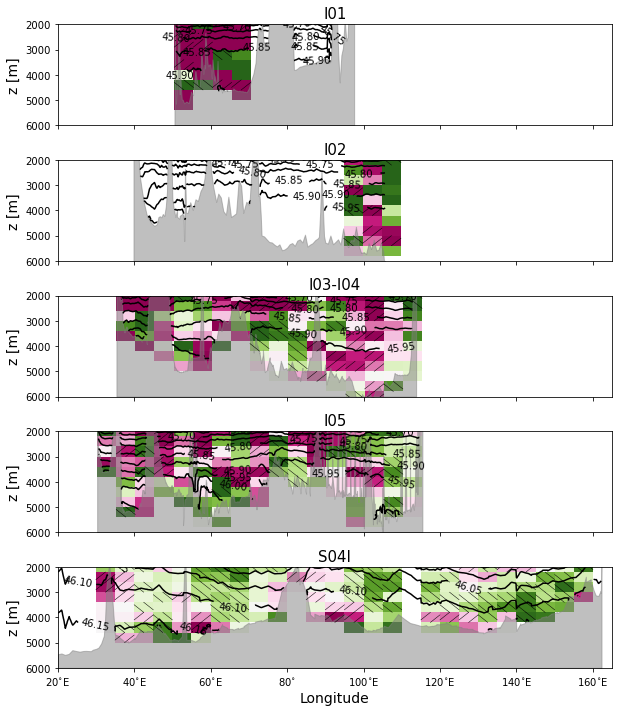

In [22]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(145/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data = xr.open_dataset(datafilepath + acquisition.lower() + ".nc")
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")
    
    plot_N2_trend_z(Data_trend, ax[i], np.diff(Data_trend.LL_st)[0], np.diff(Data_trend.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['z1_lw'], param_plot['z1_up']])
    cs = ax[i].contour(Data.LL, Data.z_N2, np.nanmean(Data.Sig4_N2,axis=0).T, levels=np.arange(param_plot['sig1_up'], param_plot['sig1_lw'], .05),colors='k',linewidth='.5')
    ax[i].clabel(cs, cs.levels, fmt ='%1.2f',  inline=True, fontsize=10)
    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('z [m]', fontsize=14)
    ax[i].set_xlim([20, 165])
    ax[i].set_xticks(np.arange(20, 165, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['20$^{\circ}$E','40$^{\circ}$E','60$^{\circ}$E','80$^{\circ}$',
                               '100$^{\circ}$E', '120$^{\circ}$E', '140$^{\circ}$E', '160$^{\circ}$E'])
        ax[i].set_xlabel('Longitude', fontsize=14)
    if lat_sec[i].startswith('S'):
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'southern/')
        loc_ll[loc_ll>180]-=360
    else:
        loc_ll, dep_ll = loc_dep_sec(lat_sec[i], method_sec, datafilepath_sec+'indian/')
        loc_ll[loc_ll>180]-=360
    ax[i].fill_between(loc_ll, dep_ll, param_plot['z1_lw'], color='.5', alpha=.5)

plt.tight_layout()
plt.savefig(outfilepath+ 'Indian_zonal_N2trend.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Indian_zonal_N2trend.eps')

/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.pcolormesh(np.hstack([data_N2_trend.LL_st.data,data_N2_trend.LL_st.data[-1]+dl]),
/var/folders/sr/6_bkfhj929364hv72k5pf2jw0000gn/T/ipykernel_27665/4202119098.py:31: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two min

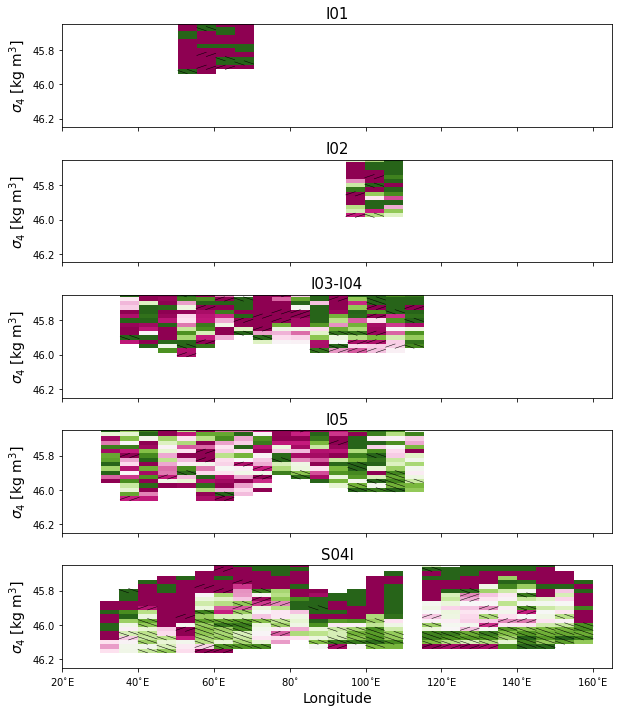

In [23]:
fig, ax = plt.subplots(nrows=len(lat_sec), ncols=1, figsize=(145/100*6, len(lat_sec)*2), sharex=True)
for i in range(len(lat_sec)):
    acquisition = lat_sec[i]
    Data_trend = xr.open_dataset(datafilepath + acquisition.lower() + "_trend.nc")
    Data_trend_sig4 = xr.open_dataset(datafilepath+ acquisition.lower() + "_sig4_trend.nc")

    
    plot_N2_trend_sig(Data_trend_sig4, ax[i], np.diff(Data_trend_sig4.LL_st)[0], np.diff(Data_trend_sig4.z_N2)[0], vrange=param_plot['vlim1'], yrange=[param_plot['sig1_lw'], param_plot['sig1_up']])

    ax[i].set_title(acquisition, fontsize=15)
    ax[i].set_ylabel('$\sigma_4$ [kg m$^3$]', fontsize=14)
    ax[i].set_xlim([20, 165])
    ax[i].set_xticks(np.arange(20, 165, 20))
    if i == len(lat_sec)-1:
        ax[i].set_xticklabels(['20$^{\circ}$E','40$^{\circ}$E','60$^{\circ}$E','80$^{\circ}$',
                               '100$^{\circ}$E', '120$^{\circ}$E', '140$^{\circ}$E', '160$^{\circ}$E'])
        ax[i].set_xlabel('Longitude', fontsize=14)

plt.tight_layout()
plt.savefig(outfilepath+ 'Indian_zonal_N2trend_sigma.jpeg', dpi=300)
plt.savefig(outfilepath+ 'Indian_zonal_N2trend_sigma.eps')